In [1]:
import numpy as np
import pandas as pd
from pathlib import Path

# Use Path to construct absolute paths from the notebook location
notebook_dir = Path.cwd()
results_dir = notebook_dir / "src" / "results"

# If notebook is run from src/notebooks, adjust the path
if not results_dir.exists():
    results_dir = notebook_dir.parent.parent / "src" / "results"

data1 = np.load(results_dir / "kmeans_torch_benchmark_scores.npz")
data2 = np.load(results_dir / "kmeans_mlx_benchmark_scores.npz")
data3 = np.load(results_dir / "kmeans_np_benchmark_scores.npz")
data4 = np.load(results_dir / "kmeans_sklearn_benchmark_scores.npz")

df = pd.DataFrame([data1, data2, data3, data4]).set_index('name')
df

,adjusted_rand_index,fit_time_seconds,normalized_mutual_info,post_fit_memory_current_MB,post_fit_memory_peak_MB,pre_fit_memory_current_MB,pre_fit_memory_peak_MB,silhouette_score
name,,,,,,,,
KMeans_Torch,-0.03157770018464697,0.21007895469665527,0.012474014312799998,0.092995,0.108927,0.00056,0.0006,0.525843046231932
KMeans_MLX,-0.03161118498720334,0.03947091102600098,0.012468588860843968,0.130367,0.130839,0.00032,0.00036,0.5259226307804478
KMeans_NP,-0.03157770018464697,0.025603055953979492,0.012474014312799998,0.246295,14.161976,0.00032,0.00036,0.525843046231932
KMeans_sklearn,-0.03161118498720334,0.1900479793548584,0.012468588860843968,0.369329,4.402002,0.00032,0.000488,0.5259226307804478


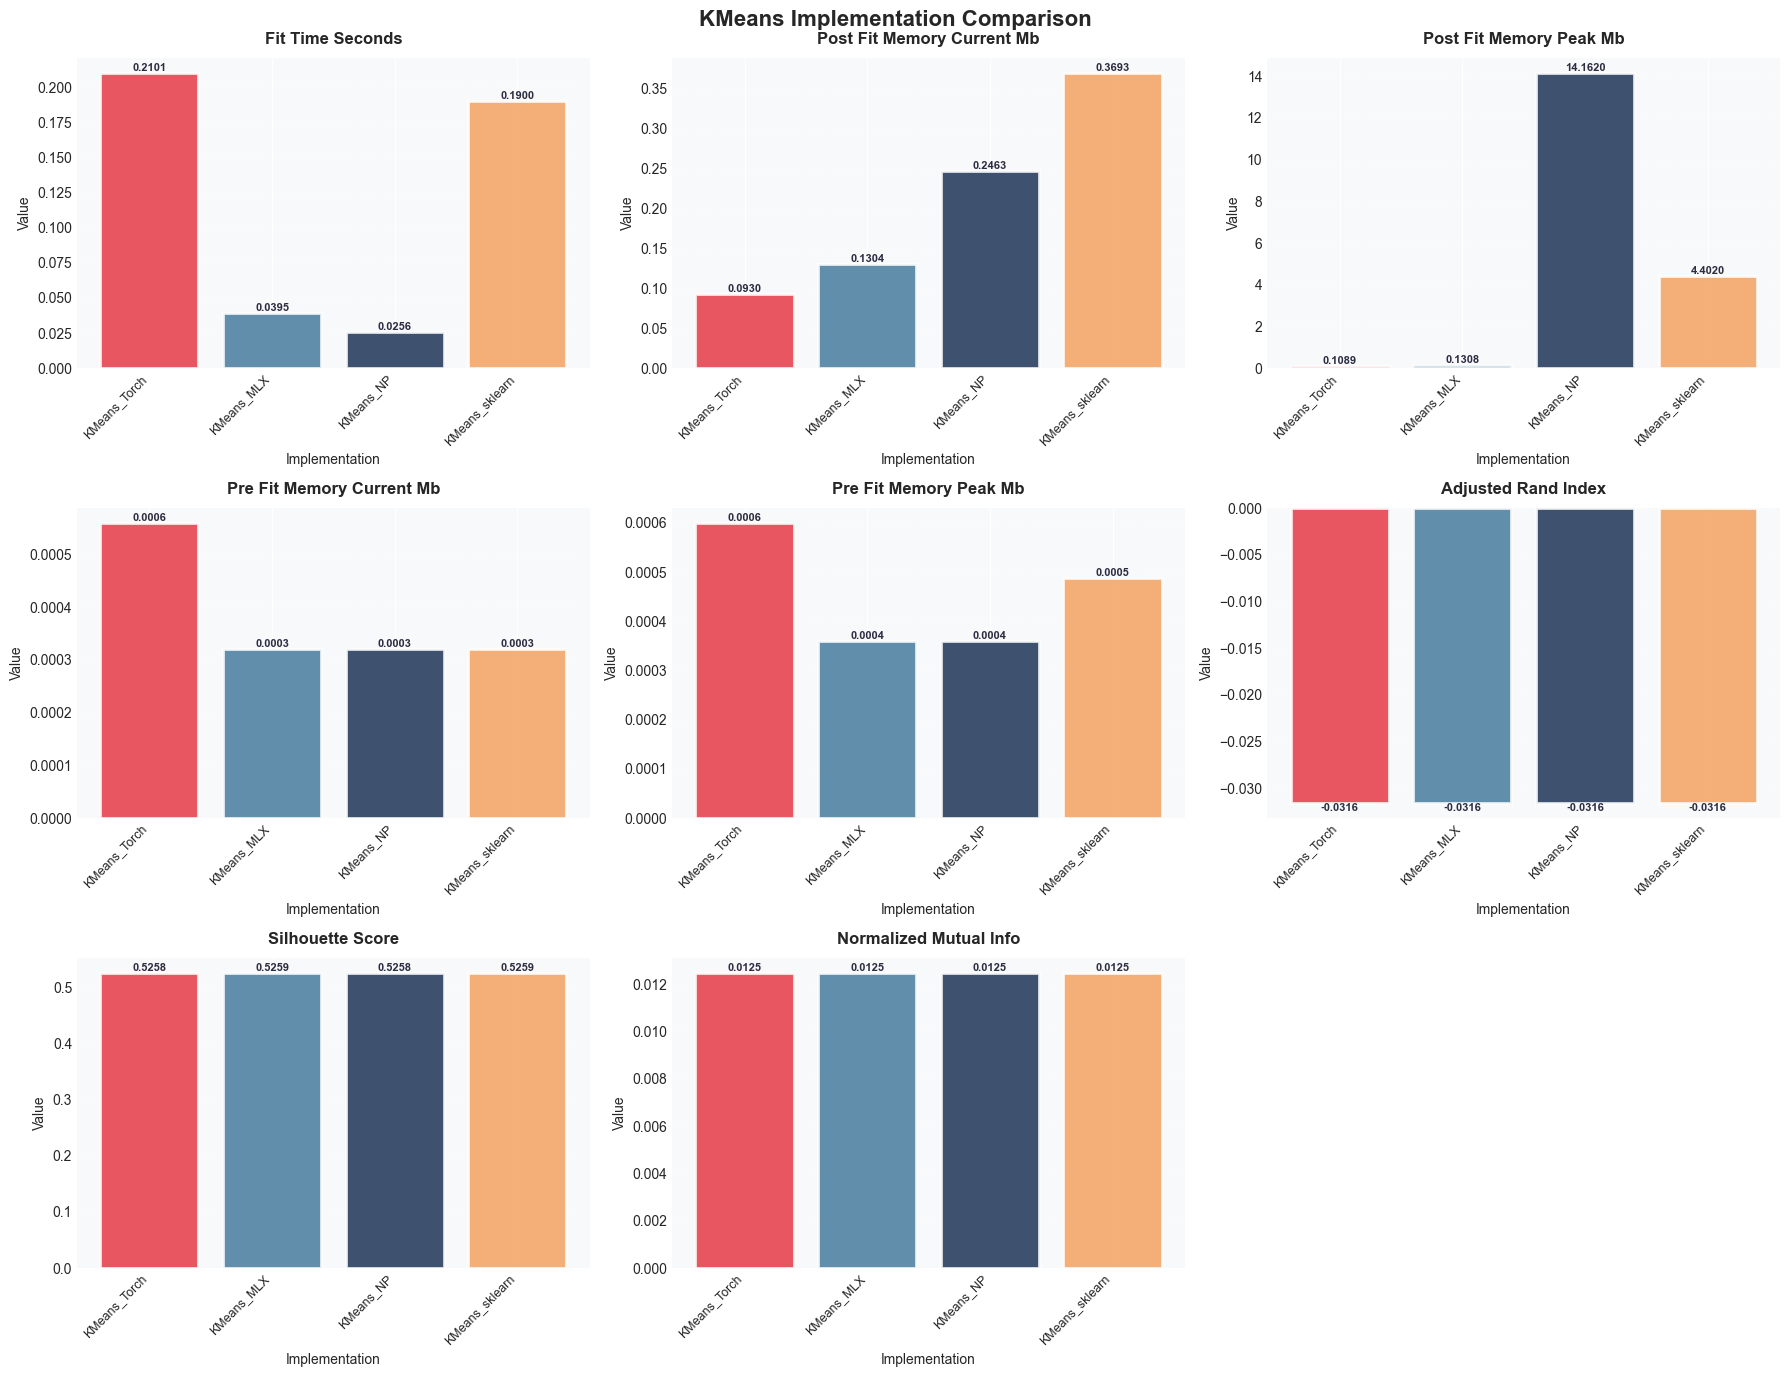

In [2]:
import matplotlib.pyplot as plt

# Set up the plotting style
plt.style.use("seaborn-v0_8-darkgrid")
fig, axes = plt.subplots(3, 3, figsize=(18, 14))
fig.suptitle("KMeans Implementation Comparison", fontsize=16, fontweight="bold")

# Flatten axes for easier iteration
axes = axes.flatten()

# Define the metrics to plot
metrics = [
    "fit_time_seconds",
    "post_fit_memory_current_MB",
    "post_fit_memory_peak_MB",
    "pre_fit_memory_current_MB",
    "pre_fit_memory_peak_MB",
    "adjusted_rand_index",
    "silhouette_score",
    "normalized_mutual_info"
]

# Get implementation names from index
implementations = df.index.tolist()

# Aesthetic color palette - Professional gradient scheme
colors = ["#E63946", "#457B9D", "#1D3557", "#F4A261"]

# Create bar plot for each metric
for idx, metric in enumerate(metrics):
    ax = axes[idx]

    # Get the data for this metric
    values = df[metric].values

    # Create bar plot with gradient colors
    bars = ax.bar(
        range(len(implementations)),
        values,
        color=colors,
        alpha=0.85,
        edgecolor='white',
        linewidth=2
    )

    # Customize the plot
    ax.set_title(metric.replace("_", " ").title(), fontsize=12, fontweight="bold", pad=10)
    ax.set_ylabel("Value", fontsize=10)
    ax.set_xlabel("Implementation", fontsize=10)
    ax.set_xticks(range(len(implementations)))
    ax.set_xticklabels(implementations, rotation=45, ha="right", fontsize=9)
    ax.grid(axis="y", alpha=0.3, linestyle='--')
    
    # Set background color
    ax.set_facecolor('#F8F9FA')

    # Add value labels on top of bars
    for i, (bar, val) in enumerate(zip(bars, values)):
        height = bar.get_height()
        # Position label above or below based on value
        va = 'bottom' if height >= 0 else 'top'
        y_pos = height if height >= 0 else height
        
        ax.text(
            bar.get_x() + bar.get_width() / 2.0,
            y_pos,
            f"{val:.4f}",
            ha="center",
            va=va,
            fontsize=8,
            fontweight="bold",
            color='#2B2D42'
        )

# Hide the extra subplot (we have 9 slots but only 8 metrics)
axes[8].set_visible(False)

plt.tight_layout()
plt.show()

In [ ]:
import plotly.express as px
import plotly.graph_objects as go

fig = go.Figure()
fig.add_bar(
    x=df.index,
    y=df["fit_time_seconds"],
    name="Fit Time (seconds)",
)
fig.add_bar(
    x=df.index,
    y=df["post_fit_memory_current_MB"],
    name="Post Fit Memory Current (MB)",
)
fig.add_bar(
    x=df.index,
    y=df["adjusted_rand_index"],
    name="Adjusted Rand Index",
)
fig.add_bar(
    x=df.index,
    y=df["normalized_mutual_info"],
    name="Normalized Mutual Info",
)
fig.add_bar(
    x=df.index,
    y=df["silhouette_score"],
    name="Silhouette Score",
)
fig.update_traces(texttemplate="%{y:.4f}", textposition="outside")
fig.update_yaxes(range=[-0.1, 0.6])
fig.update_layout(
    title_font_size=20,
    xaxis_title_font_size=16,
    yaxis_title_font_size=16,
    legend_title_font_size=14,
)
fig.update_layout(
    barmode="group",
    title="KMeans Implementation Benchmark Comparison",
    yaxis_title="Metrics of Evaluation",
    xaxis_title="Implementations",
)
fig.show()

In [4]:
df[['fit_time_seconds', 'post_fit_memory_current_MB', 'adjusted_rand_index', 'normalized_mutual_info', 'silhouette_score']]

,fit_time_seconds,post_fit_memory_current_MB,adjusted_rand_index,normalized_mutual_info,silhouette_score
name,,,,,
KMeans_Torch,0.21007895469665527,0.092995,-0.03157770018464697,0.012474014312799998,0.525843046231932
KMeans_MLX,0.03947091102600098,0.130367,-0.03161118498720334,0.012468588860843968,0.5259226307804478
KMeans_NP,0.025603055953979492,0.246295,-0.03157770018464697,0.012474014312799998,0.525843046231932
KMeans_sklearn,0.1900479793548584,0.369329,-0.03161118498720334,0.012468588860843968,0.5259226307804478


In [5]:
df.to_csv("../results/results.csv")